# General Object Detection con YOLOv5 (without training)



# Carga de librería YOLOv5

In [ ]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15997, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 15997 (delta 19), reused 19 (delta 12), pack-reused 15967
Receiving objects: 100% (15997/15997), 14.58 MiB | 18.85 MiB/s, done.
Resolving deltas: 100% (10985/10985), done.


In [ ]:
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)

In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Carga de imagen de pruebas

In [ ]:
!wget https://www.dropbox.com/s/7e8fmcipzfh1573/urbanview.jpg

--2023-09-28 12:10:23--  https://www.dropbox.com/s/7e8fmcipzfh1573/urbanview.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7e8fmcipzfh1573/urbanview.jpg [following]
--2023-09-28 12:10:23--  https://www.dropbox.com/s/raw/7e8fmcipzfh1573/urbanview.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc0440ea78c818704a8bf99a520.dl.dropboxusercontent.com/cd/0/inline/CEkCVO5AbrUA41269wTJmDFkrB1-PvBW3wOCYQoer-NEvJf0lnKL6ynMhG3HJsUBNGTieltU3sI1xSx_NqbrgNOiXA8au5F26ZYQXN0d9KGsag0uWSYtpHhpkcbP-YrmTck/file# [following]
--2023-09-28 12:10:23--  https://ucc0440ea78c818704a8bf99a520.dl.dropboxusercontent.com/cd/0/inline/CEkCVO5AbrUA41269wTJmDFkrB1-PvBW3wOCYQoer-NEvJf0lnKL6ynMhG3HJsUBNGTieltU3sI1xSx_NqbrgNOiXA8au5F26ZYQXN0d9KGsag0uWSYtpHhp

In [ ]:
NEW_PATH_TEST = '../newtest'
TEST_IMAGE    = 'urbanview.jpg'

In [ ]:
!mkdir {NEW_PATH_TEST}

In [ ]:
!cp {TEST_IMAGE} {NEW_PATH_TEST}

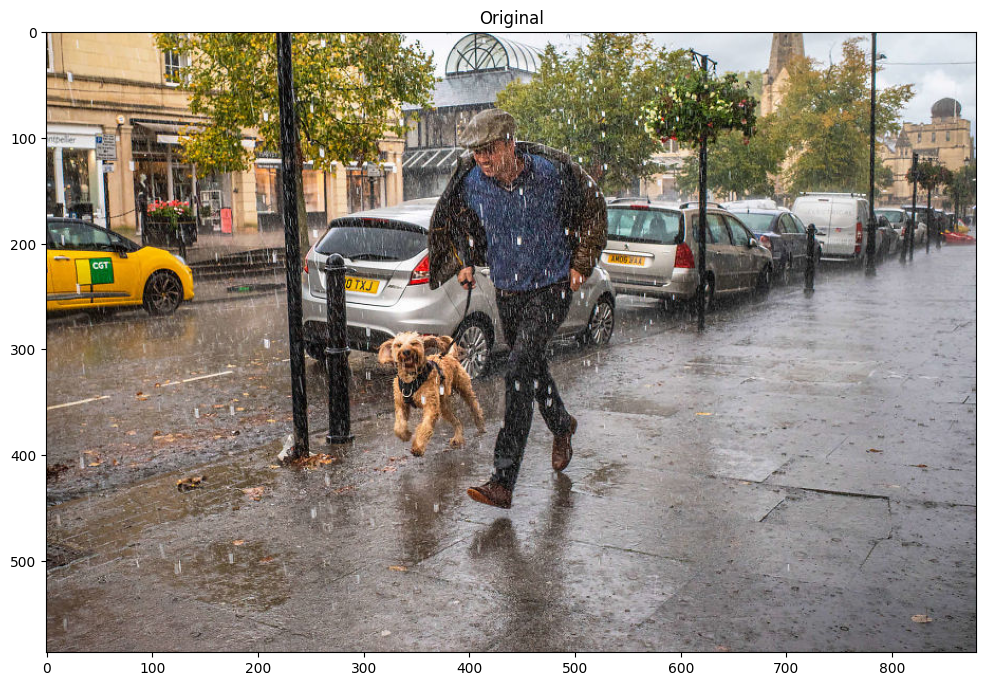

In [ ]:

X = cv2.imread('../newtest/urbanview.jpg')
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.show()


# Detección

(usando YOLOv5s.pt, entregado en ImageNet)

In [ ]:
TEST_WEIGHTS = 'yolov5s.pt'

In [ ]:
!python detect.py --weights {TEST_WEIGHTS} --img 256 --conf 0.4 --source  {NEW_PATH_TEST} --save-txt

detect: weights=['yolov5s.pt'], source=../newtest, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CPU

100% 14.1M/14.1M [00:00<00:00, 170MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/newtest/urbanview.jpg: 192x256 1 person, 5 cars, 1 dog, 143.5ms
Speed: 0.4ms pre-process, 143.5ms inference, 31.5ms NMS per image at shape (1, 3, 256, 256)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


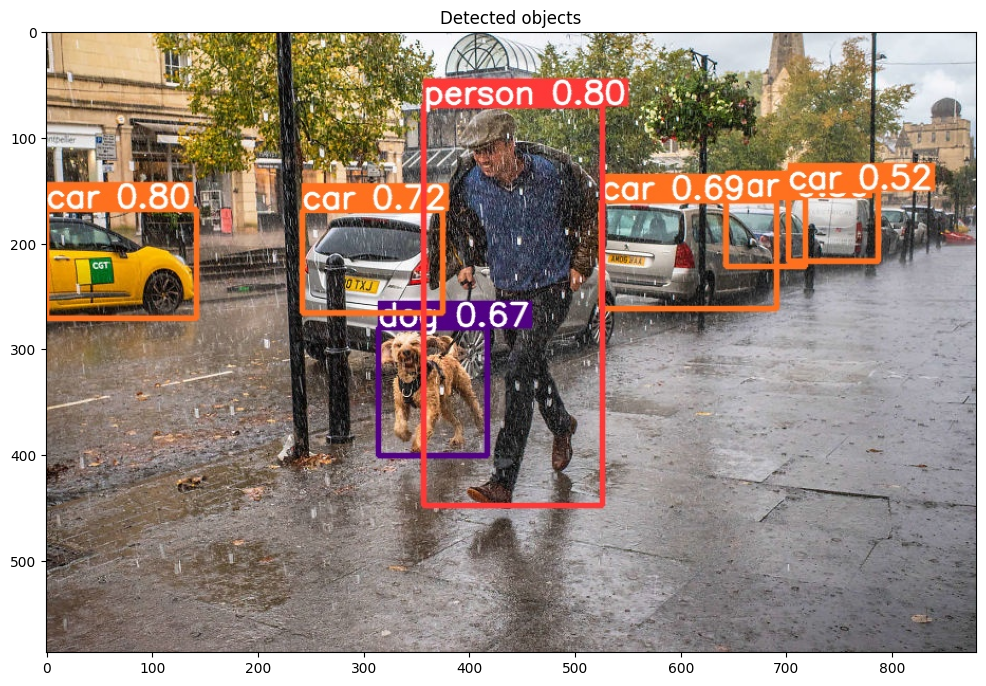

In [ ]:
X = cv2.imread('runs/detect/exp/urbanview.jpg')
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title('Detected objects')
plt.show()


# Despliegue de resultados

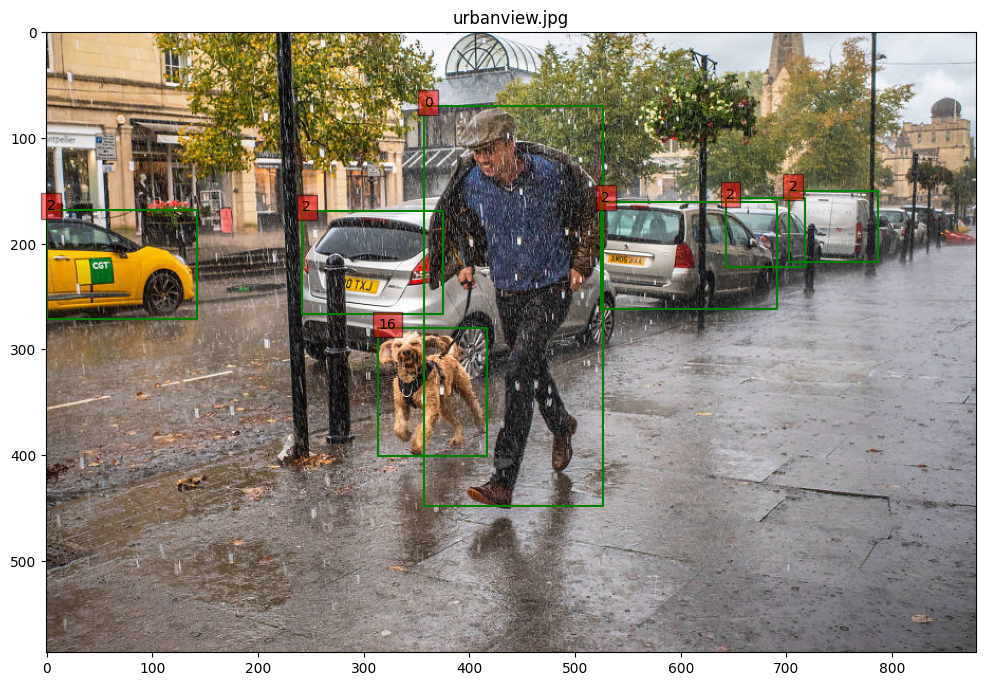

In [ ]:
iname = TEST_IMAGE
ipath = 'runs/detect/exp/'
lpath = ipath+'labels/'
X = cv2.imread(NEW_PATH_TEST +'/'+iname)
N = X.shape[0]
M = X.shape[1]
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title(iname)
lname = lpath+iname[:-4]+'.txt'
if os.path.isfile(lname):
  arr = np.loadtxt(lname)
  if len(arr.shape)==1:
    n = 1
  else:
    n = arr.shape[0]
  for k in range(n):
    if n>1:
        z = arr[k,:]
    else:
        z = arr
    cl = int(z[0]) # object class
    x = z[1]*M
    y = z[2]*N
    w2 = z[3]*M/2
    h2 = z[4]*N/2
    x1 = x-w2
    x2 = x+w2
    y1 = y-h2
    y2 = y+h2
    plt.plot([x1,x1,x2,x2,x1],[y1,y2,y2,y1,y1],'g')
    plt.text(x1,y1,str(cl),bbox=dict(facecolor='red', alpha=0.5))
    k = k+1

plt.show()
